# TUBES

Data penjualan video games di dunia

Dataset ini diambil dari vgchartz.com

Dataset penjualan video games ini memiliki 16.698 input dan 11 kolom

1. Rank - Peringkat penjualan keseluruhan
2. Name - Nama video games
3. Platform - Platform dimana video gamesnya release ( PC,PS4, etc.)
4. Year - Tahun dari gamesnya release
5. Genre - Genre dari gamesnya
6. Publisher - Publisher dari games
7. NA_Sales - Penjualan di Amerika Utara (dalam juta)
8. EU_Sales - Penjualan di Eropa (dalam juta)
9. JP_Sales - Penjualan di Jepang (dalam juta)
10. Other_Sales - Penjualan di daerah lain (dalam juta)
11. Global_Sales - Total penjualan seluruh dunia

## Read Data

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score,mean_absolute_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [194]:
df = pd.read_csv('vgsales.csv')

## Data Understanding

In [195]:
print('=== Data Head === ')
print(df.head())

=== Data Head === 
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


### Menampilkan type data


In [196]:
print(' === Data Info ===')
df.info()

 === Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Mengecek Duplikasi Data dan data yang kosong

In [197]:
print('data duplikat: ')
print(df.duplicated().sum(),'\n')
print('Data yang memiliki nilai null: ')
print(df.isnull().sum())

data duplikat: 
0 

Data yang memiliki nilai null: 
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### EDA

#### TOP PLATFORM

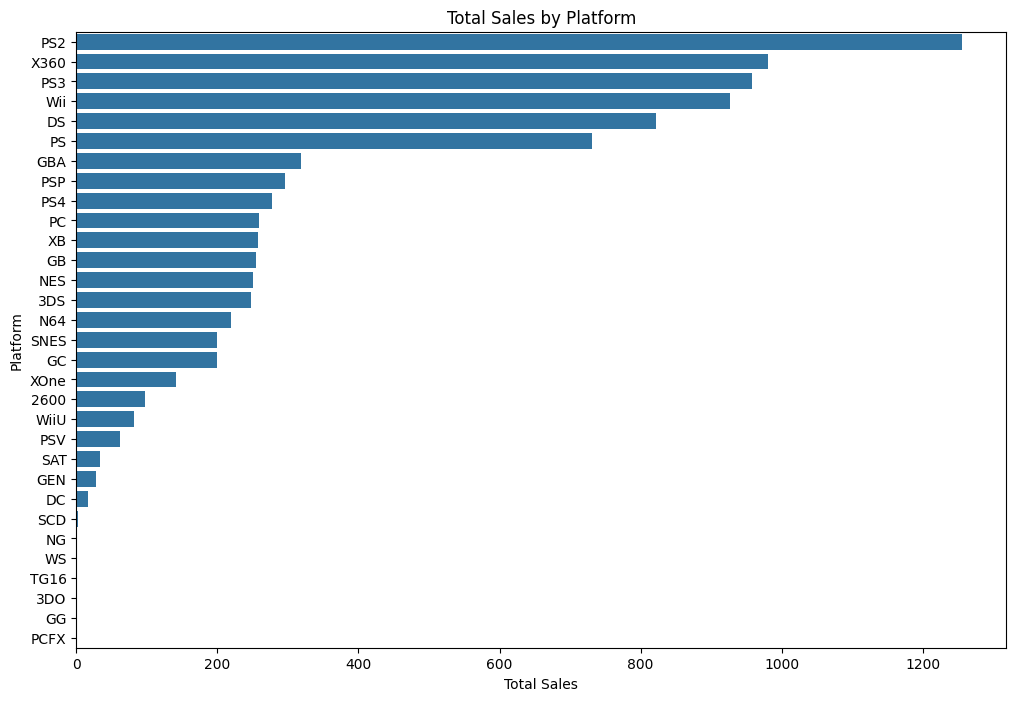

In [198]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)
plt.figure(figsize=(12, 8))
sns.barplot(x= platform_sales.values, y = platform_sales.index)
plt.title('Total Sales by Platform')
plt.xlabel('Total Sales')
plt.ylabel('Platform')
plt.show()

#### PUBLISHERS DENGAN TOTAL PENJUALAN TERTINGGI

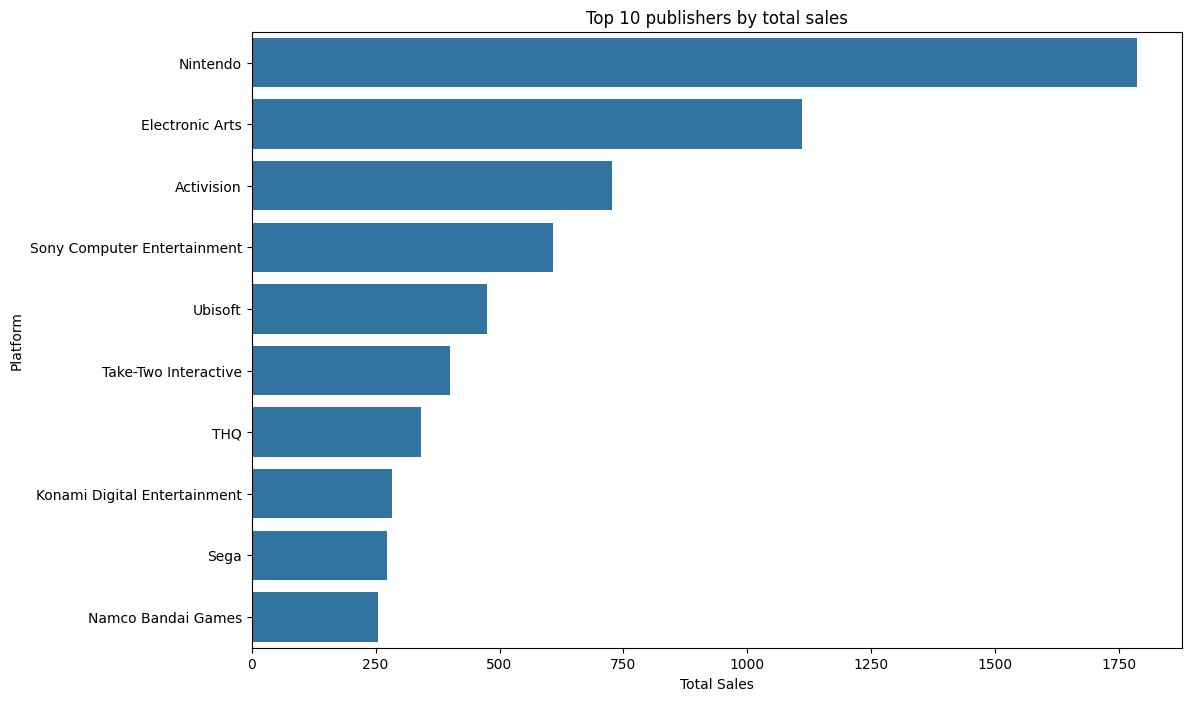

In [199]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x = publisher_sales.values, y = publisher_sales.index)
plt.title('Top 10 publishers by total sales')
plt.xlabel('Total Sales')
plt.ylabel('Platform')
plt.show()

#### PERBANDINGAN PENJUALAN DI SETIAP DAERAH

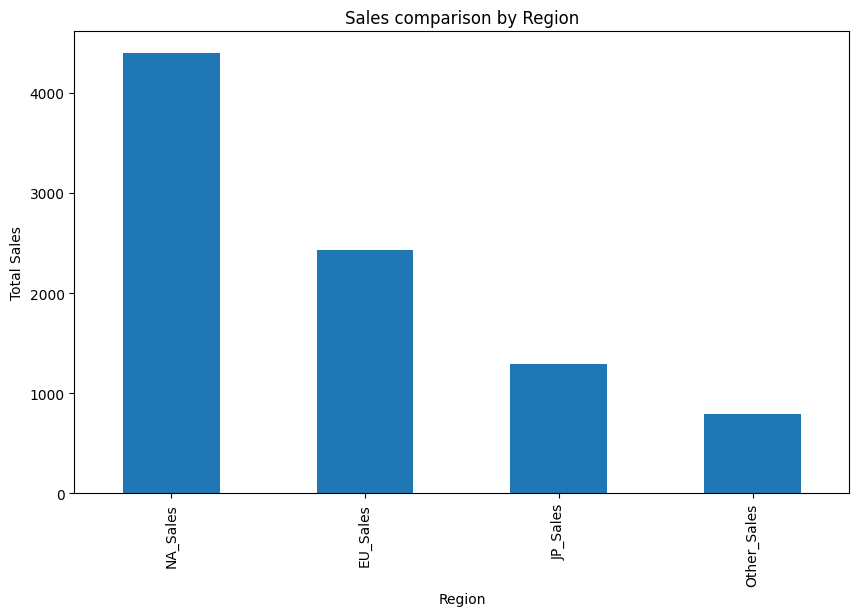

In [200]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(10, 6))
region_sales.plot(kind = 'bar')
plt.title('Sales comparison by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

## Preprocessing

### Drop data dengan nilai NaN pada kolom yang akan dipakai yaitu year, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales.

In [201]:
df = df.dropna(subset=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

### Mengubah data Year menjadi int

In [202]:
df['Year'] = df['Year'].astype(int)

### Drop Data yang outlier

#### Menampilkan data outlier

Outliers in NA_Sales:
      NA_Sales
0        41.49
1        29.08
2        15.85
3        15.75
4        11.27
...        ...
2977      0.62
2981      0.63
2995      0.63
3044      0.63
3079      0.62

[1660 rows x 1 columns]



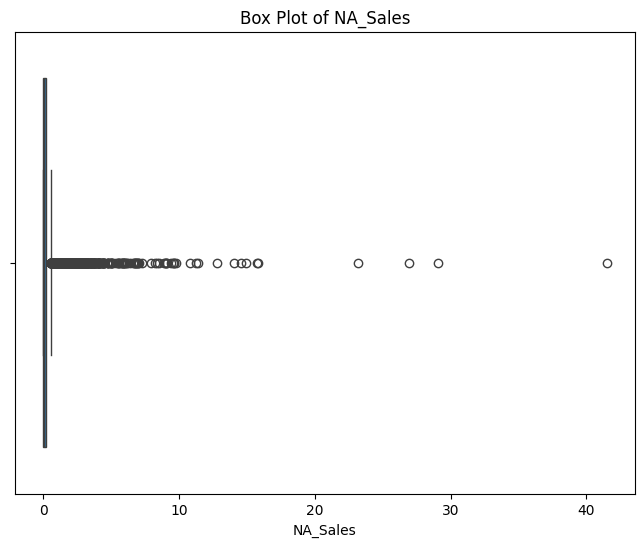

Outliers in EU_Sales:
      EU_Sales
0        29.02
1         3.58
2        12.88
3        11.01
4         8.89
...        ...
5463      0.30
5523      0.28
5636      0.28
5643      0.30
5759      0.29

[2054 rows x 1 columns]



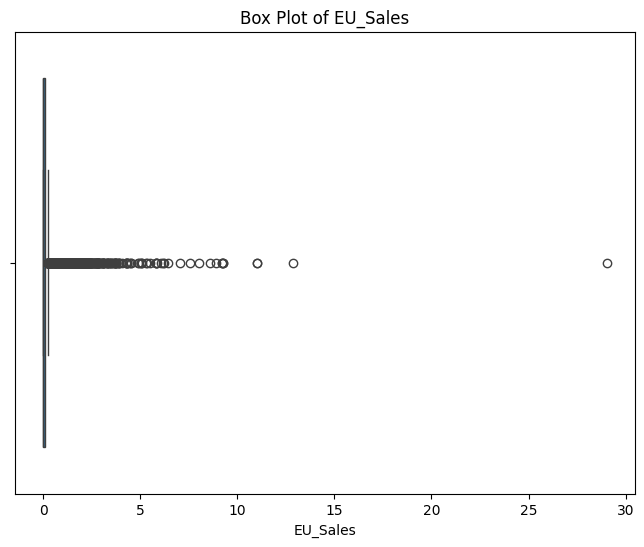

Outliers in JP_Sales:
       JP_Sales
0          3.77
1          6.81
2          3.79
3          3.28
4         10.22
...         ...
10399      0.11
10405      0.11
10408      0.11
10410      0.11
10412      0.11

[2407 rows x 1 columns]



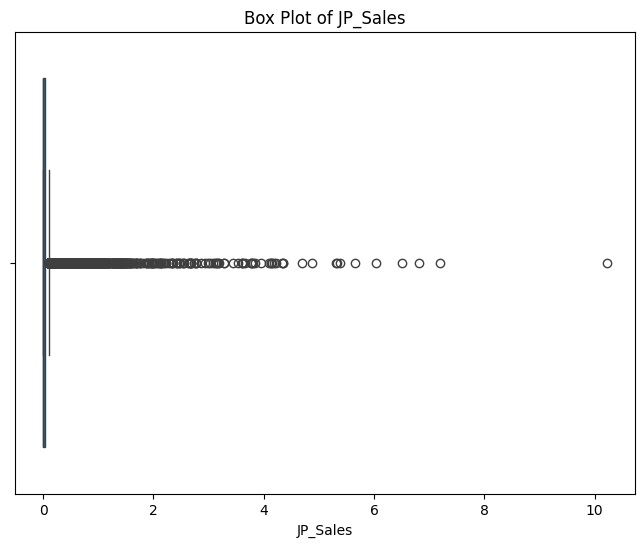

Outliers in Other_Sales:
      Other_Sales
0            8.46
1            0.77
2            3.31
3            2.96
4            1.00
...           ...
7138         0.12
7167         0.21
7520         0.19
8055         0.18
9260         0.12

[1645 rows x 1 columns]



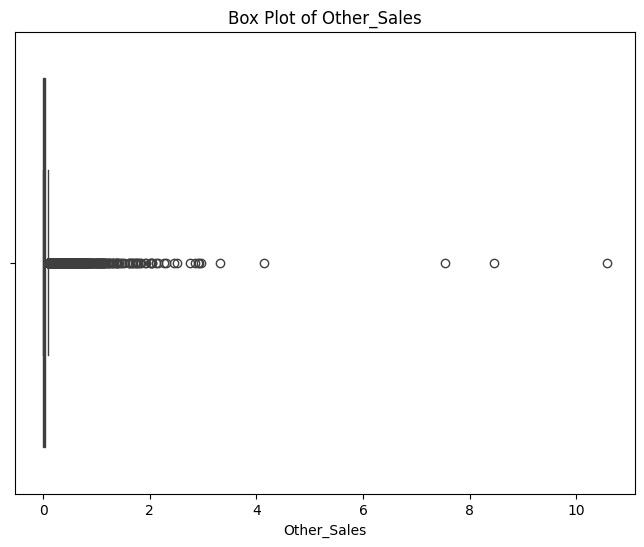

Outliers in Global_Sales:
      Global_Sales
0            82.74
1            40.24
2            35.82
3            33.00
4            31.37
...            ...
1842          1.11
1843          1.11
1844          1.11
1845          1.11
1846          1.11

[1827 rows x 1 columns]



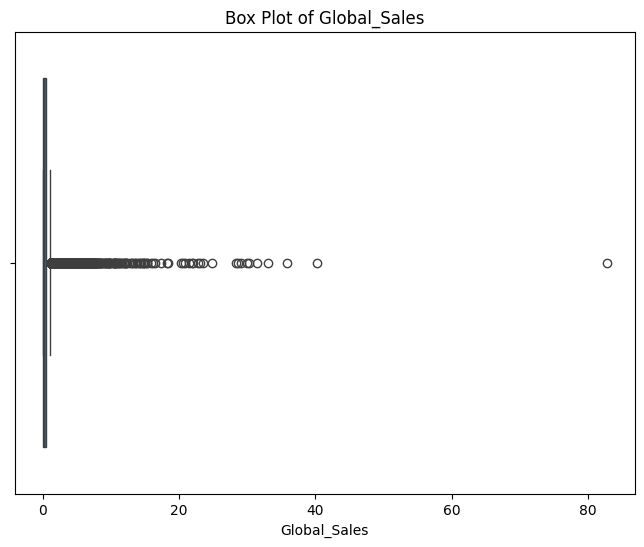

In [203]:
numerical_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Mengecek data outlier dari kolom yang akan kita gunakan dengan IQR
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Outliers in {col}:\n{outliers[[col]]}\n")

  # Visualization
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

#### Drop outlier dengan IQR

In [204]:
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Example: Print the info of the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14500 entries, 1847 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          14500 non-null  int64  
 1   Name          14500 non-null  object 
 2   Platform      14500 non-null  object 
 3   Year          14500 non-null  int64  
 4   Genre         14500 non-null  object 
 5   Publisher     14465 non-null  object 
 6   NA_Sales      14500 non-null  float64
 7   EU_Sales      14500 non-null  float64
 8   JP_Sales      14500 non-null  float64
 9   Other_Sales   14500 non-null  float64
 10  Global_Sales  14500 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.3+ MB


#### Visualisasi setelah kita drop

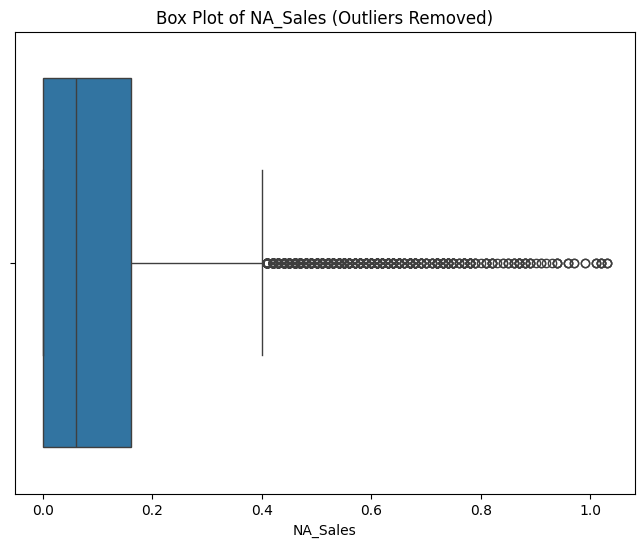

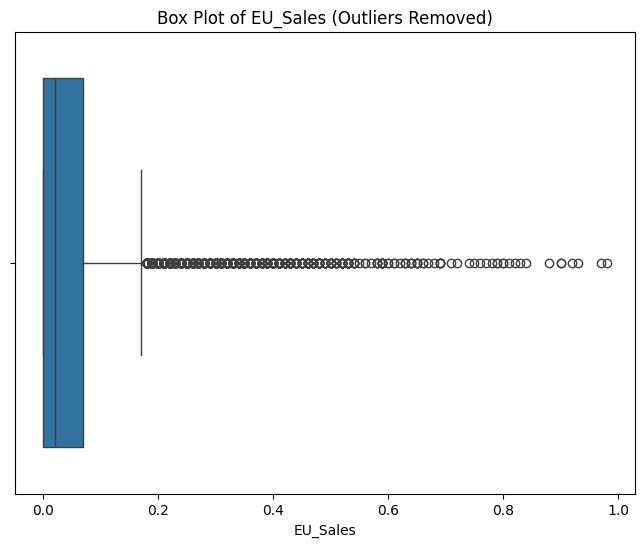

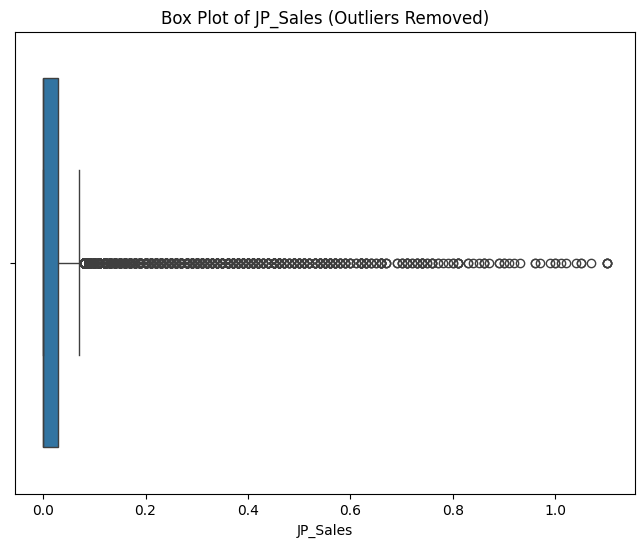

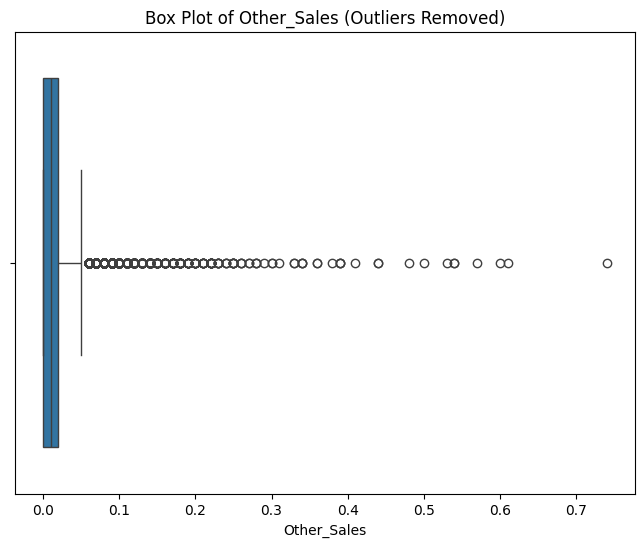

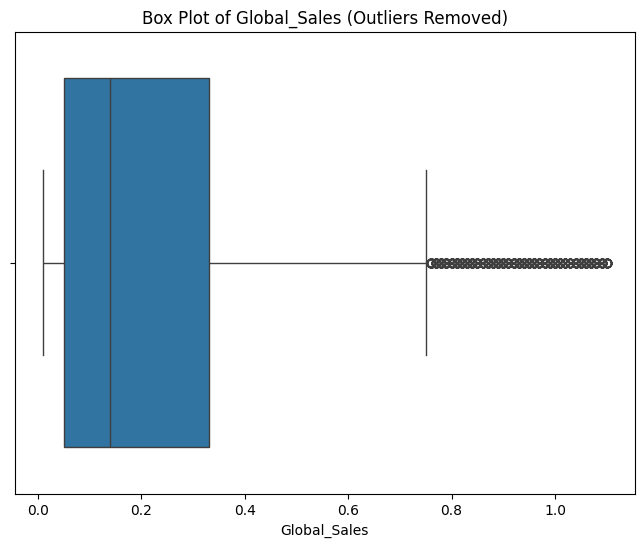

In [205]:
# visualization after outlier removal
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col} (Outliers Removed)')
  plt.show()

#### Mengecek deskripsi setelah pembersihan outlier

In [206]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  14500.000000  14500.000000  14500.000000  14500.000000  14500.000000   
mean    9221.387931   2006.620966      0.116582      0.057210      0.040717   
std     4257.114913      5.595393      0.154826      0.097711      0.104998   
min     1849.000000   1980.000000      0.000000      0.000000      0.000000   
25%     5531.750000   2003.000000      0.000000      0.000000      0.000000   
50%     9221.500000   2007.000000      0.060000      0.020000      0.000000   
75%    12908.250000   2010.000000      0.160000      0.070000      0.030000   
max    16600.000000   2020.000000      1.030000      0.980000      1.100000   

        Other_Sales  Global_Sales  
count  14500.000000  14500.000000  
mean       0.019434      0.234250  
std        0.035908      0.246815  
min        0.000000      0.010000  
25%        0.000000      0.050000  
50%        0.010000      0.140000  
75%        0.020000      0.330000  


#### Melakukan standarisasi pada kolom yang akan digunakan

In [207]:
cluster_data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data)

## K-Means

untuk menemukan pola atau kelompok video game berdasarkan kesamaan performa penjualannya di berbagai wilayah.

### Mencari jumlah clustering yang cocok dengan elbow method

In [208]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

### visualisasikan elbow methodnya

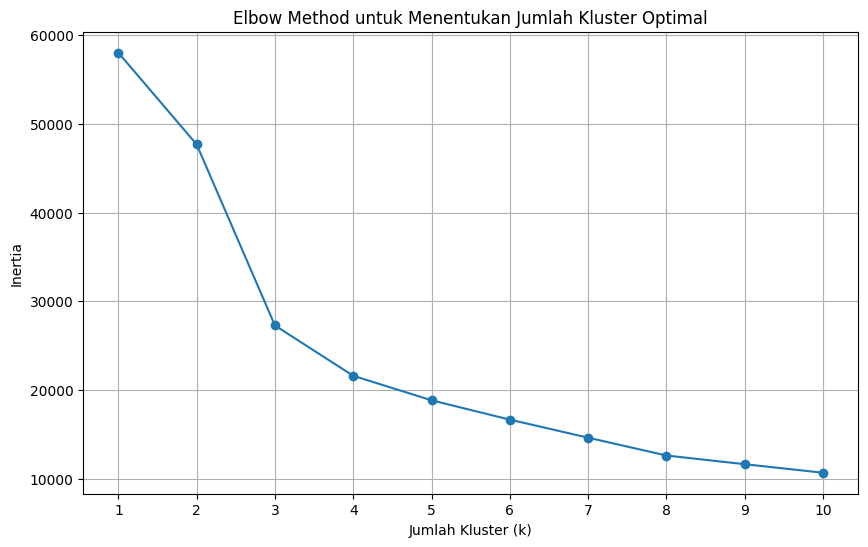

In [209]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia, 'o-')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Kluster Optimal')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

In [210]:
elbow_df = pd.DataFrame({'Jumlah Kluster (K)': range(1,11), 'Inertia': inertia})
print(elbow_df)

   Jumlah Kluster (K)       Inertia
0                   1  58000.000000
1                   2  47665.350603
2                   3  27274.670819
3                   4  21607.000215
4                   5  18848.491736
5                   6  16669.228169
6                   7  14637.965863
7                   8  12628.489586
8                   9  11649.734109
9                  10  10688.777051


In [211]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster = kmeans.fit_predict(scaled_features)
cluster_data['Cluster'] = cluster

C:\Users\Xexon\AppData\Local\Temp\ipykernel_15836\1033940740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = cluster


In [212]:
cluster_data.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
1847,0.53,0.40,0.00,0.17,2
1848,1.03,0.06,0.00,0.01,3
1849,0.45,0.53,0.01,0.12,2
1850,0.52,0.33,0.17,0.08,2
1851,1.03,0.06,0.00,0.01,3


In [213]:

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_definitions = pd.DataFrame(
    cluster_centers,
    columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    index=[f'Cluster {i}' for i in range(len(cluster_centers))]
)

print("Pusat Cluster:")
print(cluster_definitions)


cluster_stats = cluster_data.groupby('Cluster').mean()
print("\nStatistik Cluster:")
print(cluster_stats)


Pusat Cluster:
           NA_Sales  EU_Sales  JP_Sales  Other_Sales
Cluster 0  0.051917  0.021876  0.021852     0.006615
Cluster 1  0.042971  0.020316  0.401011     0.012743
Cluster 2  0.289965  0.339516  0.016843     0.117926
Cluster 3  0.337117  0.113787  0.013338     0.039231

Statistik Cluster:
         NA_Sales  EU_Sales  JP_Sales  Other_Sales
Cluster                                           
0        0.051917  0.021876  0.021852     0.006615
1        0.042971  0.020316  0.401011     0.012743
2        0.289919  0.339436  0.016824     0.117860
3        0.337151  0.113726  0.013344     0.039223


1. Cluster 0:
- Karakteristik: NA_Sales, EU_Sales, JP_Sales, dan Other_Sales relatif rendah.
- Definisi: Game dengan penjualan rendah di semua wilayah. Cluster ini mungkin berisi game yang kurang populer secara global.
2. Cluster 1:
- Karakteristik: NA_Sales dan EU_Sales lebih tinggi dibanding wilayah lain. JP_Sales dan Other_Sales sangat kecil.
- Definisi: Game yang populer di Amerika Utara dan Eropa, tetapi kurang berhasil di Jepang dan wilayah lainnya.
3. Cluster 2:
- Karakteristik: Penjualan cukup merata di semua wilayah, tetapi nilainya tidak setinggi Cluster 1.
- Definisi: Game dengan distribusi penjualan yang cukup seimbang di seluruh wilayah.
4. Cluster 3:
- Karakteristik: NA_Sales sangat tinggi, tetapi penjualan di wilayah lainnya rendah.
- Definisi: Game yang sangat populer di Amerika Utara, tetapi kurang berhasil di pasar lain.

**Kesimpulan:**
1. Segmentasi Pasar:
- Cluster ini menunjukkan bagaimana pasar video game memiliki pola distribusi penjualan yang berbeda di berbagai wilayah.
- Game yang populer di Amerika Utara (Cluster 3) mungkin membutuhkan strategi promosi berbeda dibandingkan game dengan penjualan seimbang (Cluster 2).
2. Fokus Regional:
- Cluster 1 dan 3 menunjukkan pentingnya pasar Amerika Utara dan Eropa dalam industri video game.
- Game di Cluster 0 mungkin memerlukan strategi pemasaran atau pengembangan lebih lanjut untuk meningkatkan penjualan.
3. Perbedaan Preferensi Regional:
- Cluster ini membantu mengidentifikasi preferensi pasar tertentu, seperti game yang lebih diterima di Amerika Utara dan Eropa dibandingkan Jepang.

### Evaluasi model dengan silhouette score

In [214]:
print(f"Silhouette Score untuk K-Means dengan 4 klaster: {silhouette_score(scaled_features, cluster)}")

Silhouette Score untuk K-Means dengan 4 klaster: 0.5281616879576708


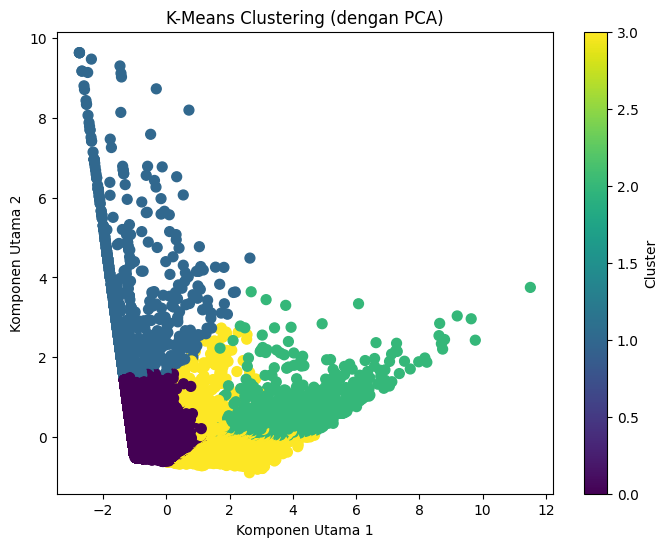

=== K-Means Clustering ===
         NA_Sales  EU_Sales  JP_Sales  Other_Sales
Cluster                                           
0        0.051917  0.021876  0.021852     0.006615
1        0.042971  0.020316  0.401011     0.012743
2        0.289919  0.339436  0.016824     0.117860
3        0.337151  0.113726  0.013344     0.039223


In [215]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering (dengan PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Cluster')
plt.show()

print("=== K-Means Clustering ===")
print(cluster_data.groupby('Cluster').mean())

## Linear Regression

### Encode untuk genre dan platfor

In [216]:
coloum_use = df[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]

df_encode = pd.get_dummies(coloum_use, columns=['Genre', 'Platform'], drop_first=True)

In [217]:
coloum_use.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1847,PS3,Misc,0.53,0.40,0.00,0.17,1.1
1848,2600,Shooter,1.03,0.06,0.00,0.01,1.1
1849,X360,Shooter,0.45,0.53,0.01,0.12,1.1
1850,3DS,Action,0.52,0.33,0.17,0.08,1.1
1851,2600,Platform,1.03,0.06,0.00,0.01,1.1


In [218]:
df_encode.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
1847,0.53,0.40,0.00,0.17,1.1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1848,1.03,0.06,0.00,0.01,1.1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1849,0.45,0.53,0.01,0.12,1.1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1850,0.52,0.33,0.17,0.08,1.1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1851,1.03,0.06,0.00,0.01,1.1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### Split Data

In [219]:
X = df_encode.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
Y = df_encode[['Global_Sales']]

In [220]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14500 entries, 1847 to 16597
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Genre_Adventure     14500 non-null  bool 
 1   Genre_Fighting      14500 non-null  bool 
 2   Genre_Misc          14500 non-null  bool 
 3   Genre_Platform      14500 non-null  bool 
 4   Genre_Puzzle        14500 non-null  bool 
 5   Genre_Racing        14500 non-null  bool 
 6   Genre_Role-Playing  14500 non-null  bool 
 7   Genre_Shooter       14500 non-null  bool 
 8   Genre_Simulation    14500 non-null  bool 
 9   Genre_Sports        14500 non-null  bool 
 10  Genre_Strategy      14500 non-null  bool 
 11  Platform_3DO        14500 non-null  bool 
 12  Platform_3DS        14500 non-null  bool 
 13  Platform_DC         14500 non-null  bool 
 14  Platform_DS         14500 non-null  bool 
 15  Platform_GB         14500 non-null  bool 
 16  Platform_GBA        14500 non-null  bool 


In [221]:
X.head()

,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
1847,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1848,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1849,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1850,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1851,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [222]:
Y.head()

,Global_Sales
1847,1.1
1848,1.1
1849,1.1
1850,1.1
1851,1.1


In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Inisiasi Model

In [224]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [225]:
Y_pred = model.predict(X_test)

### Evaluasi Model

In [226]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Linear Regression - Mean Squared Error: {mse:.4f}")
print(f"Linear Regression - R^2 Score: {r2:.4f}")

Linear Regression - Mean Squared Error: 0.0568
Linear Regression - R^2 Score: 0.0933


###  Ridge Regression

#### Mencari Best alpha

In [227]:
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='r2')

In [228]:
best_ridge = ridge_grid.best_estimator_
print('Best Alpha untuk ridge: ', best_ridge)

Best Alpha untuk ridge:  Ridge(alpha=0.1)


#### Train Ridge Regression

In [229]:
Y_pred_ridge = best_ridge.predict(X_test)

#### Evaluasi Ridge Regression

In [230]:
print("=== Ridge Regression ===")
print(f"R^2 Score: {r2_score(Y_test, Y_pred_ridge):.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred_ridge):.2f}")

=== Ridge Regression ===
R^2 Score: 0.09
Mean Squared Error: 0.06


### Lasso

#### Mencari Best Alpha

In [231]:
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='r2')

In [232]:
best_lasso = lasso_grid.best_estimator_
print('Best Alpha untuk ridge: ', best_lasso)

Best Alpha untuk ridge:  Lasso(alpha=0.01)


#### Train Lasso

In [233]:
Y_pred_lasso = best_lasso.predict(X_test)

#### Evaluasi Model Lasso

In [234]:
print("=== Lasso Regression ===")
print(f"R^2 Score: {r2_score(Y_test, Y_pred_lasso):.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred_lasso):.2f}")

=== Lasso Regression ===
R^2 Score: -0.00
Mean Squared Error: 0.06


Berdasarkan hasil di atas, Ridge Regression adalah model terbaik di antara ketiganya. Meskipun perbedaan MSE dengan model lainnya sangat kecil, Ridge Regression memiliki R² yang sedikit lebih tinggi daripada Linear Regression dan jauh lebih baik daripada Lasso yang memiliki R² negatif.

# Coba input linear regre

In [235]:
input_data = np.array([[False,True,False,True,False,True,False,False
                        ,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False]])

prediction = best_ridge.predict(input_data)

print('hasil prediksi global', prediction)

hasil prediksi global [[0.22236884]]


c:\Users\Xexon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


<!-- ## Random Forest -->

In [236]:
import pickle

filename= 'prediksi_global_sales.pkl'
pickle.dump(best_ridge,open(filename,'wb'))

filename_col = 'X_train_columns.pkl'
pickle.dump(X_train.columns, open(filename_col, 'wb'))

### Memilih kolom yang digunakan

In [237]:
# data = df[['Genre', 'Platform', 'Global_Sales']]

### Encode genre dan platform

In [238]:
# ohe = OneHotEncoder()
# encoded_features = ohe.fit_transform(data[['Genre', 'Platform']]).toarray()
# feature_names = ohe.get_feature_names_out(['Genre', 'Platform'])
# encoded_df = pd.DataFrame(encoded_features, columns=feature_names)
# data_prepared = pd.concat([encoded_df, data['Global_Sales'].reset_index(drop=True)], axis=1)

### Split data

In [239]:
# X = data_prepared.drop('Global_Sales', axis=1)
# y = data_prepared['Global_Sales']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membuat random forest

In [240]:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

In [241]:
# y_pred = model.predict(X_test)

### Evaluasi model

In [242]:
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Print evaluation metrics
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R2): {r2:.2f}")

In [243]:
# feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# print("\nFeature Importances:")
# print(feature_importances)